<center style="font-size:42px;">
Predicting Employee Attrition
</center>

# Introduction

**Problem statement** : Employee turnover is costly and disruptive to businesses. Identifying employees at risk of leaving early allows companies to take preventive measures, improving retention rates and reducing recruitment costs.
It is important to determine which factors keep employees at the company and which prompt others to leave

Predictive modeling can be used to analyze patterns from historical employee data, identifying factors that contribute to attrition. By analyzing key indicators like job satisfaction, performance, and tenure, if you can predict the which employeeis leaving the organization, you can enable HR teams to focus on retention strategies, and prevent the loss of good employees. Losing employees is not only detrimental in terms of money which comes from the usefulness that they provide, but also the investment of time and effort that they put in to train them

We use a popular dataset on kaggle : https://www.kaggle.com/datasets/colearninglounge/employee-attrition to explore more about this. The data is in csv format with 35 columns, and includes information like level of education, job involvement, performance rating, gender, work life balance ratings, etc.

**The Objective :** to determine which factors contribute to an employee leaving, and being able to predict whether an employee will leave or not

# Data Preprocessing and Cleaning

#### Preprocessing will involve :
- The preprocessing done will likely involve imputation for missing values, removal of outliers and normalization for numerical columns.    
- It will also involve dropping unnecessary columns, and making new features from existing ones
    
#### Analysis and Visualization will involve:   
- analysing the correlation between different features(likely using pairplots)   
- performing statistical operations like mean, mode, variance, etc on the numerical columns   
- Using boxplots on the numerical values.  
- Making different graphs and charts for the key attributes in the dataset

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [45]:
df = pd.read_csv("employee_attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Preprocessing for analysis

Let's try to check for missing values and duplicate rows

In [46]:
df.isnull().sum().sum()

0

In [47]:
df.duplicated().sum()

0

It turns out that there are no missing values or duplicate rows

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [49]:
pd.DataFrame(df.columns, columns=['Column Name'])

,Column Name
0,Age
1,Attrition
2,BusinessTravel
3,DailyRate
4,Department
5,DistanceFromHome
6,Education
7,EducationField
8,EmployeeCount
9,EmployeeNumber


In [50]:
df.select_dtypes(include=['object']).describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [51]:
for column in df.select_dtypes(include=['object']).columns:
    print(column, df[column].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
Over18 ['Y']
OverTime ['Yes' 'No']


Now lets convert the Yes/No columns to binary int columns

In [52]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

In [53]:
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)

Let's replace the Gender column with a binary int valued column where 1 means Male, and 0 means Female, for convinience

In [54]:
df["Gender_is_male"] = df["Gender"].apply(lambda x: 1 if x == 'Male' else 0).astype(int)
df = df.drop(columns=["Gender"])

Now let's convert the remaining 'object' type columns to categorical

In [55]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int32   
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  HourlyRate                1470 non-null   int64   
 12  JobInvolvement            1470 non-null   int64   
 13  JobLevel                  1470 non-null   int64 

#### Let's see the value counts for each type of categorical value

In [57]:
for column in df.select_dtypes(include=['category']).columns:
    print(df[column].value_counts(),end="\n\n")

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

Over18
Y    1470
Name: count, dtype: int64



In [58]:
for column in df.columns:
    print(column, len(df[column].unique()))

Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18
Gender_is_male 2


In [59]:
for column in df.columns:
    unique_vals = df[column].unique()
    if len(unique_vals) == 1:
        print(column, unique_vals[0])

EmployeeCount 1
Over18 Y
StandardHours 80


**We observe that the Over18,StandardHours,EmployeeCount columns have only 1 value in them.** \
All of the employees listed here are over 18, workover 80 hours. The EmployeeCount column represents the number of employees for eah row, which is marked as 1 for all the rows. \
**There are no additional insights we can gain from having these columns. We will delete them**

In [60]:
for column in df.columns:
    if len(df[column].unique()) == 1:
        df = df.drop(columns=[column])

### EDA (Exploratory Data Analysis)

##### Displaying the basic statical measurements of each numerical column

In [61]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_is_male
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.600000
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.490065
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,1.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,1.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


##### Visualizing the correlation matrix using a heatmap

In [62]:
df.select_dtypes(include=[np.number]).corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_is_male
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.036311
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,...,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,0.029453
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.011716
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,-0.001851
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.016547
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,0.022556
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,0.000508
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.000478
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,0.017960
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.039403


<Axes: >

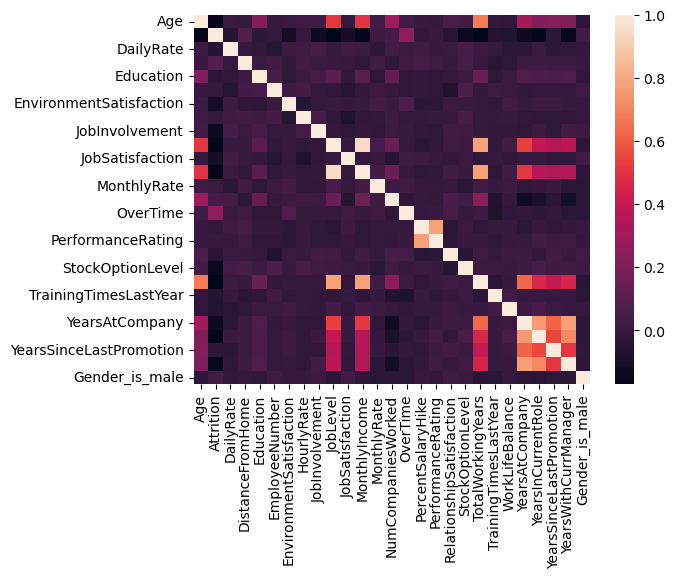

In [63]:
# df.select_dtypes(include=['float','int','bool']).corr()
sns.heatmap(df.select_dtypes(include=[np.number]).corr())

In [64]:
import numpy as np
import pandas as pd

correlation_matrix = df.select_dtypes(include=[np.number]).corr()

threshold = 0.75

high_correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]
            high_correlation_pairs.append((feature1, feature2, correlation))

high_correlation_pairs.sort(key=lambda x: x[2], reverse=True)
highly_correlated_features = pd.DataFrame(high_correlation_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
display(highly_correlated_features)

,Feature 1,Feature 2,Correlation
0,JobLevel,MonthlyIncome,0.950300
1,JobLevel,TotalWorkingYears,0.782208
2,PercentSalaryHike,PerformanceRating,0.773550
3,MonthlyIncome,TotalWorkingYears,0.772893
4,YearsAtCompany,YearsWithCurrManager,0.769212
5,YearsAtCompany,YearsInCurrentRole,0.758754


Conclusions
1. **JobLevel and MonthlyIncome** : The 2 most highly correlated features are JobLevel and MonthlyIncome at ~0.95 . -> Indicating that as employees move up in job levels, their monthly income increases significantly. This is expected as higher job levels typically come with higher salaries.

2. **JobLevel and TotalWorkingYears** : This indicates that employees with more years of experience tend to be at higher job levels. This is logical as more experienced employees are often promoted to higher positions.

3. **PercentSalaryHike and PerformanceRating** :  This suggests that employees who receive higher performance ratings are likely to receive higher percentage salary hikes. This aligns with common performance-based compensation practices.

4. **MonthlyIncome and TotalWorkingYears** : There is a strong positive correlation between Monthly Income and Total Working Years. This indicates that employees with more years of experience tend to have higher monthly incomes. This is consistent with the idea that experience often leads to higher pay.

5. **YearsAtCompany and YearsWithCurrManager** : This suggests that employees who have been with the company for a longer time tend to have been with their current manager for a longer period as well. This could indicate stability in management or long-term employee-manager relationships

6. **YearsInCurrentRole and YearsWithCurrManager** : This suggests that employees who have been in their current role for a longer time tend to have been with their current manager for a longer period. This could indicate that role changes and managerial changes are closely linked.

##### genders vs attrition distribution

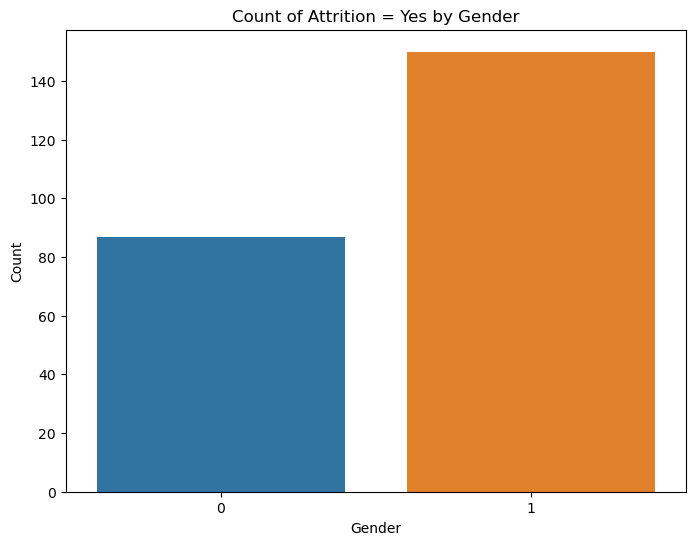

In [65]:
G_A=df.groupby(['Gender_is_male'])[['Attrition']].value_counts().reset_index()
yes_attrition = G_A[G_A['Attrition'] == 1]

plt.figure(figsize=(8, 6))
sns.barplot(data=yes_attrition, x='Gender_is_male', y='count')
plt.title('Count of Attrition = Yes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The number of rows marked as attrition=True for men is more than that for women

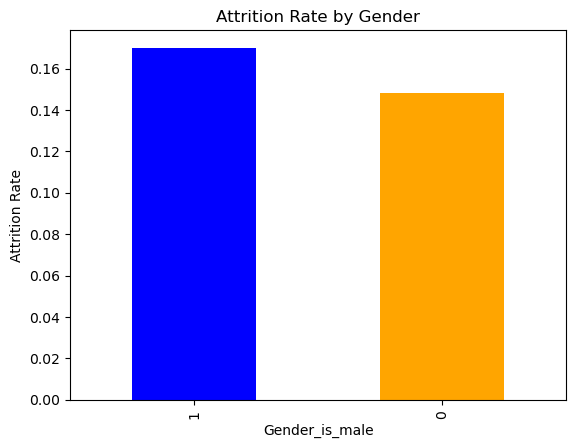

In [66]:
gender_counts = df['Gender_is_male'].value_counts()
attrition_counts = df[df['Attrition'] == 1]['Gender_is_male'].value_counts()

attrition_rate = attrition_counts / gender_counts

attrition_rate.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Gender_is_male')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Gender')
plt.show()

From the above plot, we can conclude that the male gender is slightly more likely to leave

Departments vs attrition

Department
Research & Development    133
Sales                      92
Human Resources            12
Name: count, dtype: int64


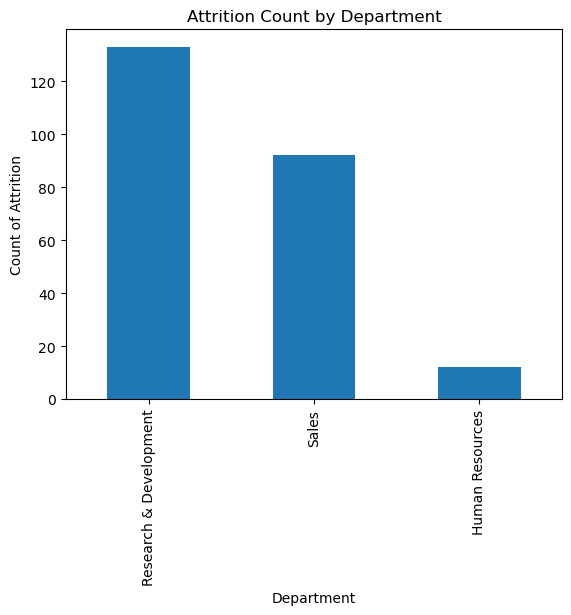

In [67]:
attrition_data = df[df['Attrition'] == 1]

attrition_by_department = attrition_data['Department'].value_counts()

attrition_by_department.plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Count of Attrition')
plt.title('Attrition Count by Department')
print(attrition_by_department)

The department with the most attritions is 'Research & Development' with 133 attritions.

Education vs attrition

In [68]:
attrition_rates_education = df.groupby('Education')['Attrition'].value_counts().unstack().fillna(0)
attrition_rates_education

Attrition,0,1
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5


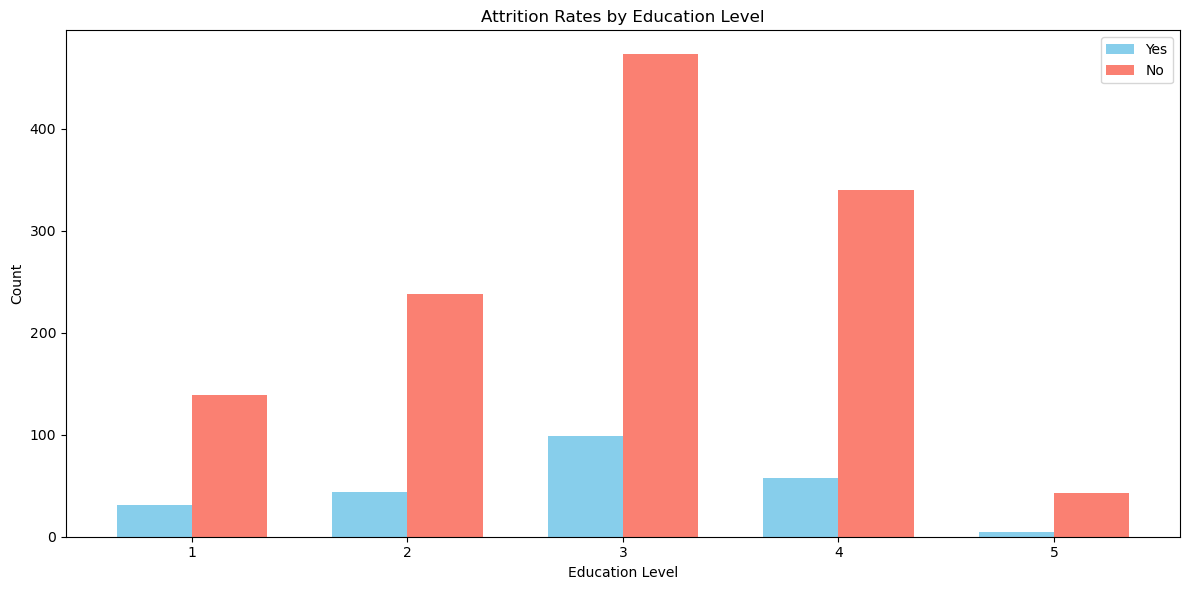

In [69]:
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = range(5)

bar1 = plt.bar(index, attrition_rates_education[1], bar_width, label='Yes', color='skyblue')
bar2 = plt.bar([i + bar_width for i in index], attrition_rates_education[0], bar_width, label='No', color='salmon')

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Attrition Rates by Education Level')
plt.xticks([i + bar_width / 2 for i in index], attrition_rates_education.index)
plt.legend()
plt.tight_layout()
plt.show()

Implication : more the education, lesser the attrition rate for those employees

Education Level 3 has the highest non-attrition count

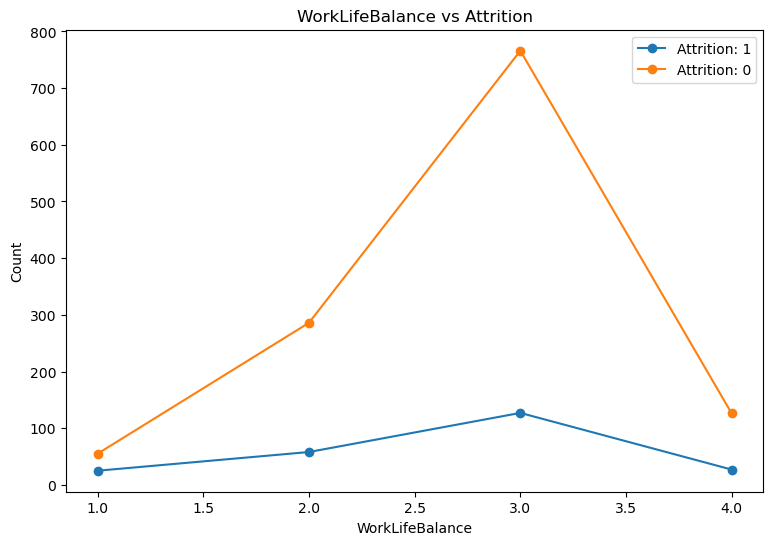

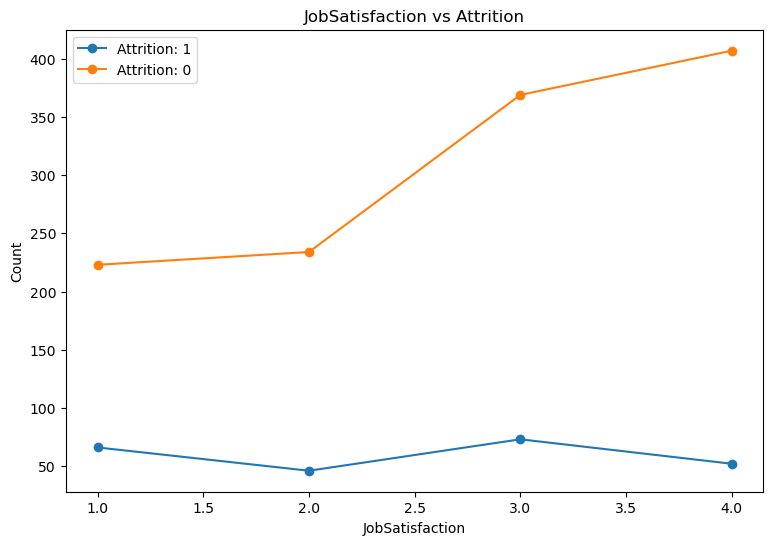

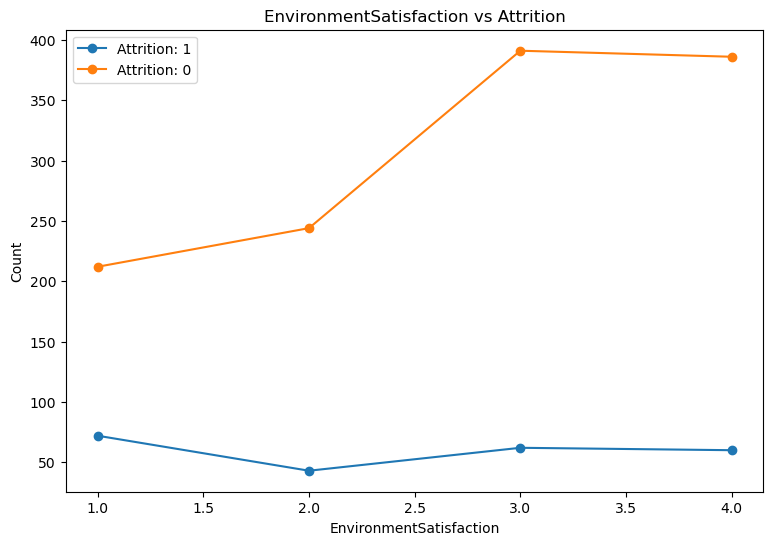

In [70]:
factors = ['WorkLifeBalance', 'JobSatisfaction', 'EnvironmentSatisfaction']

for factor in factors:
    plt.figure(figsize=(9, 6))
    for attrition_category in df['Attrition'].unique():
        data_attrition = df[df['Attrition'] == attrition_category]
        plt.plot(
            data_attrition.groupby(factor).size().index,
            data_attrition.groupby(factor).size().values,
            marker='o',
            label=f'Attrition: {attrition_category}'
        )
    
    plt.title(f'{factor} vs Attrition')
    plt.xlabel(factor)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

Implications : better environment satisfaction, job satisfaction and work/life balance is correlated with lesser attrition.

### 6. Machine Learning

The problem statement is of type classification, specifically, binary classification. A RandomForest Classifier should suffice for this task.

Let's encode the categorical columns using label encoder, to prepare it for the model

In [47]:
label_encoders = {column : LabelEncoder() for column in df.select_dtypes(include=["category"]).columns}
for column, label_encoder in label_encoders.items():
    df[column] = label_encoder.fit_transform(df[column])

Now let's make a train and test set

In [48]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, train_size=0.8)
train_x, train_y = train_df.drop(columns=["Attrition"]), train_df["Attrition"]
test_x, test_y = test_df.drop(columns=["Attrition"]), test_df["Attrition"]

fit the model to the train set

In [49]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=100, random_state=42)
clf.fit(train_x, train_y)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

# Evaluating the model

In [50]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

test_y_pred = clf.predict(test_x)

accuracy = accuracy_score(test_y, test_y_pred)
report = classification_report(test_y, test_y_pred)

In [51]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8741496598639455
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       252
           1       0.86      0.14      0.24        42

    accuracy                           0.87       294
   macro avg       0.87      0.57      0.59       294
weighted avg       0.87      0.87      0.83       294



In [52]:
conf_mat = confusion_matrix(test_y, test_y_pred)
conf_mat

array([[251,   1],
       [ 36,   6]], dtype=int64)

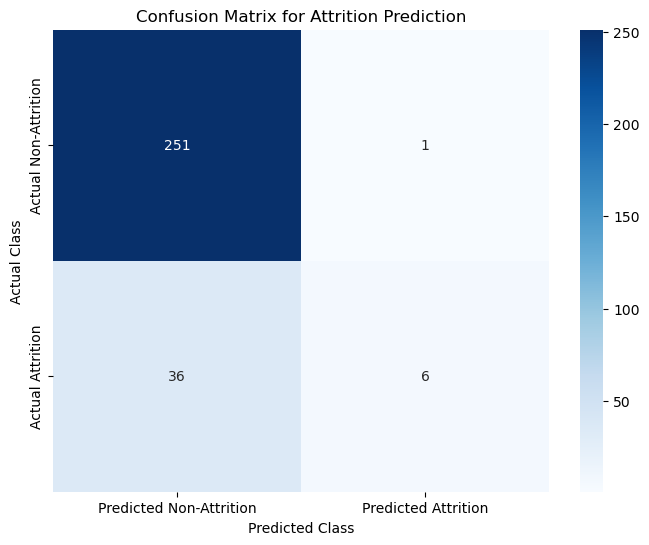

In [53]:
labels = [
    ["True Negatives (TN)", "False Positives (FP)"],
    ["False Negatives (FN)", "True Positives (TP)"],
]

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted Non-Attrition", "Predicted Attrition"],
    yticklabels=["Actual Non-Attrition", "Actual Attrition"],
)

plt.title("Confusion Matrix for Attrition Prediction")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

plt.show()